Made by Aleksandra Sharapova, id: 813617

# Problem setting

A polling institute wants to be able to estimate an individual’s income from his/her per- sonal data (see einkommen.train). To this aim, 30.000 individuals were interviewed concerning the features summarized below. For some of the individuals, not all features are available. Crucially, the income of only 5.000 of the interviewee’s is known.
Your task is to predict the income group of the remaining 25.000 interviewees and to prepare the data such that they can be used for further regression and correlation analyses.


- Age
- Employment type (Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov,
State-gov, Without-pay, Never-worked)
- Weighting factor to compensate for an interview-dependent selection bias
- Levelofeducation(Bachelors,Some-college,HS-grad,Prof-school,Assoc-acdm,Assoc- voc, 1st-4th, 5th-6th, 7th-8th, 9th, 10th, 11th, 12th, Masters, Doctorate, Preschool)
- Schooling/training period
- Marital status (Married-civ-spouse, Divorced, Never-married, Separated, Widowed,
Married-spouse-absent, Married-AF-spouse)
- Employmentarea(Tech-support,Craft-repair,Other-service,Sales,Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces)
- Partnership (Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried)
- Ethnicity (White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black)
- Gender (Female, Male)
- Gains on financial assets
- Losses on financial assets
- Weekly working time
- Country of birth (United-States, Cambodia, England, Puerto-Rico, Canada, Ger- many, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ire- land, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hun- gary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trina- dad&Tobago, Peru, Hong Kong, Holand-Netherlands)
- Income (≤ 50k, > 50k)

# Exercise
Load the data into Python and preprocess it. Choose adequate data transformations, normalizations etc. and decide on how to deal with missing values (marked with “?”). Consider which kinds of features the preprocessed data shall contain. Once you have preprocessed the data, train a model to predict a person’s income group and apply it to the 25.000 individuals whose income group is unknown. Identify a suitable learning method and implement it in Python. Train and evaluate the model. Provide a short documentation and motivation of each of your steps.

# Data preprocessing

In [ ]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

In [ ]:
import warnings

warnings.filterwarnings('ignore')

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB,BernoulliNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score,ConfusionMatrixDisplay,precision_score,recall_score,f1_score,classification_report,roc_curve,auc,precision_recall_curve,average_precision_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split


In [ ]:
train_data = pd.read_csv("einkommen_train.csv", header=None)

In [ ]:
train_data.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
train_data.rename(columns = {0:'Age', 1:'Employment_type', 2:'Weighting', 3:'Education', 4:'Schooling',
                             5:'Marital_status', 6:'Employment_area', 7:'Partnership', 8:'Ethnicity', 9:'Gender',
                             10:'Gains_financial', 11:'Losses_financial', 12:'Weekly_working_t', 13:'Country', 14:'Income'}, inplace = True)

In [ ]:
train_data.head(5)

,Age,Employment_type,Weighting,Education,Schooling,Marital_status,Employment_area,Partnership,Ethnicity,Gender,Gains_financial,Losses_financial,Weekly_working_t,Country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
train_data.shape

(30000, 15)

In [ ]:
train_data.isnull().any()

Age                 False
Employment_type     False
Weighting           False
Education           False
Schooling           False
Marital_status      False
Employment_area     False
Partnership         False
Ethnicity           False
Gender              False
Gains_financial     False
Losses_financial    False
Weekly_working_t    False
Country             False
Income              False
dtype: bool

**Checking null values**

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               30000 non-null  int64 
 1   Employment_type   30000 non-null  object
 2   Weighting         30000 non-null  int64 
 3   Education         30000 non-null  object
 4   Schooling         30000 non-null  int64 
 5   Marital_status    30000 non-null  object
 6   Employment_area   30000 non-null  object
 7   Partnership       30000 non-null  object
 8   Ethnicity         30000 non-null  object
 9   Gender            30000 non-null  object
 10  Gains_financial   30000 non-null  int64 
 11  Losses_financial  30000 non-null  int64 
 12  Weekly_working_t  30000 non-null  int64 
 13  Country           30000 non-null  object
 14  Income            30000 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.4+ MB


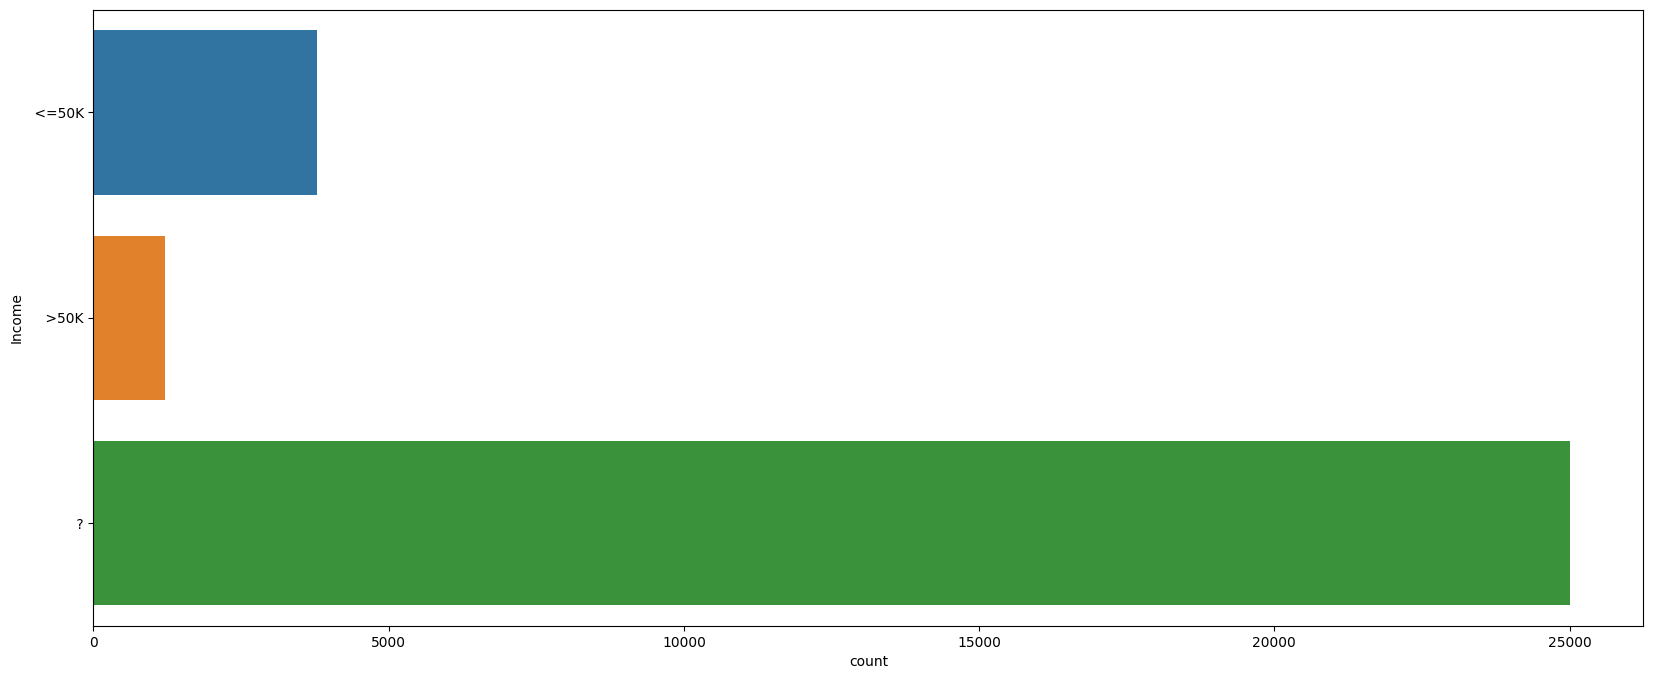

In [ ]:
fig = plt.figure(figsize=(20,8))
sns.countplot(y="Income", data=train_data);

## Creating numerical colums for all string values and dealing with missing values

---



Several approaches on dealing with missing character values:

**1) Removing Rows:** One straightforward approach is to remove rows with missing character values. This is suitable when the number of rows with missing values is relatively small and won't significantly impact the dataset's representativeness. However, if you have a lot of missing data, this approach may result in a substantial loss of information. If columns have more than half of the rows as null then the entire column can be dropped.

**2) Imputation with Mode:** Replace missing values with the mode (most frequent value) of the respective categorical variable. This is a simple method that can work well when missing data is missing at random and doesn't introduce bias.

**3) Imputation with a New Category:** Create a new category for missing values. This is a common approach for categorical data. It allows the model to explicitly recognize missing data as a distinct category. However, it might increase the dimensionality of your data and require careful handling during model training.

**4) Imputation with Conditional Mode**: Replace missing values with the mode of the respective category within a subgroup defined by another variable. This is useful when you want to capture the conditional distribution of the data more accurately. For example, if you have a dataset of students, you might impute missing values for "grade" based on the mode of grades for students of the same age.

**5) Predictive Imputation:** Use machine learning models to predict missing values based on the other features in your dataset. For categorical data, you can employ classification models. For example, decision trees or random forests can be used to predict missing categories.

**6) Multiple Imputations:** In cases where you have a substantial amount of missing data, you can perform multiple imputations. This involves creating multiple datasets with different imputed values for the missing data and training your model on each of these datasets. The results are then combined for more robust predictions.

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               30000 non-null  int64 
 1   Employment_type   30000 non-null  object
 2   Weighting         30000 non-null  int64 
 3   Education         30000 non-null  object
 4   Schooling         30000 non-null  int64 
 5   Marital_status    30000 non-null  object
 6   Employment_area   30000 non-null  object
 7   Partnership       30000 non-null  object
 8   Ethnicity         30000 non-null  object
 9   Gender            30000 non-null  object
 10  Gains_financial   30000 non-null  int64 
 11  Losses_financial  30000 non-null  int64 
 12  Weekly_working_t  30000 non-null  int64 
 13  Country           30000 non-null  object
 14  Income            30000 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.4+ MB


In [ ]:
train_data.head(5)

,Age,Employment_type,Weighting,Education,Schooling,Marital_status,Employment_area,Partnership,Ethnicity,Gender,Gains_financial,Losses_financial,Weekly_working_t,Country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## Gender

In [ ]:
train_data['Gender'].unique()

array([' Male', ' Female'], dtype=object)

We can see that there are no Nan values

In [ ]:
gender_int = [0 if i==' Male' else 1 for i in train_data['Gender']]

In [ ]:
gender_int.count(0)

20070

In [ ]:
gender_int.count(1)

9930

We can see that females are 30% less than males

**Add gender_int to Training dataframe**

In [ ]:
train_data['gender_int'] = gender_int

## Employment_type

In [ ]:
train_data['Employment_type'].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [ ]:
train_data['Employment_type'].value_counts()

 Private             20901
 Self-emp-not-inc     2363
 Local-gov            1928
 ?                    1677
 State-gov            1189
 Self-emp-inc         1037
 Federal-gov           887
 Without-pay            13
 Never-worked            5
Name: Employment_type, dtype: int64

We can see that there are 1677 missing values in the Employment type which is over 5,5% of the total data

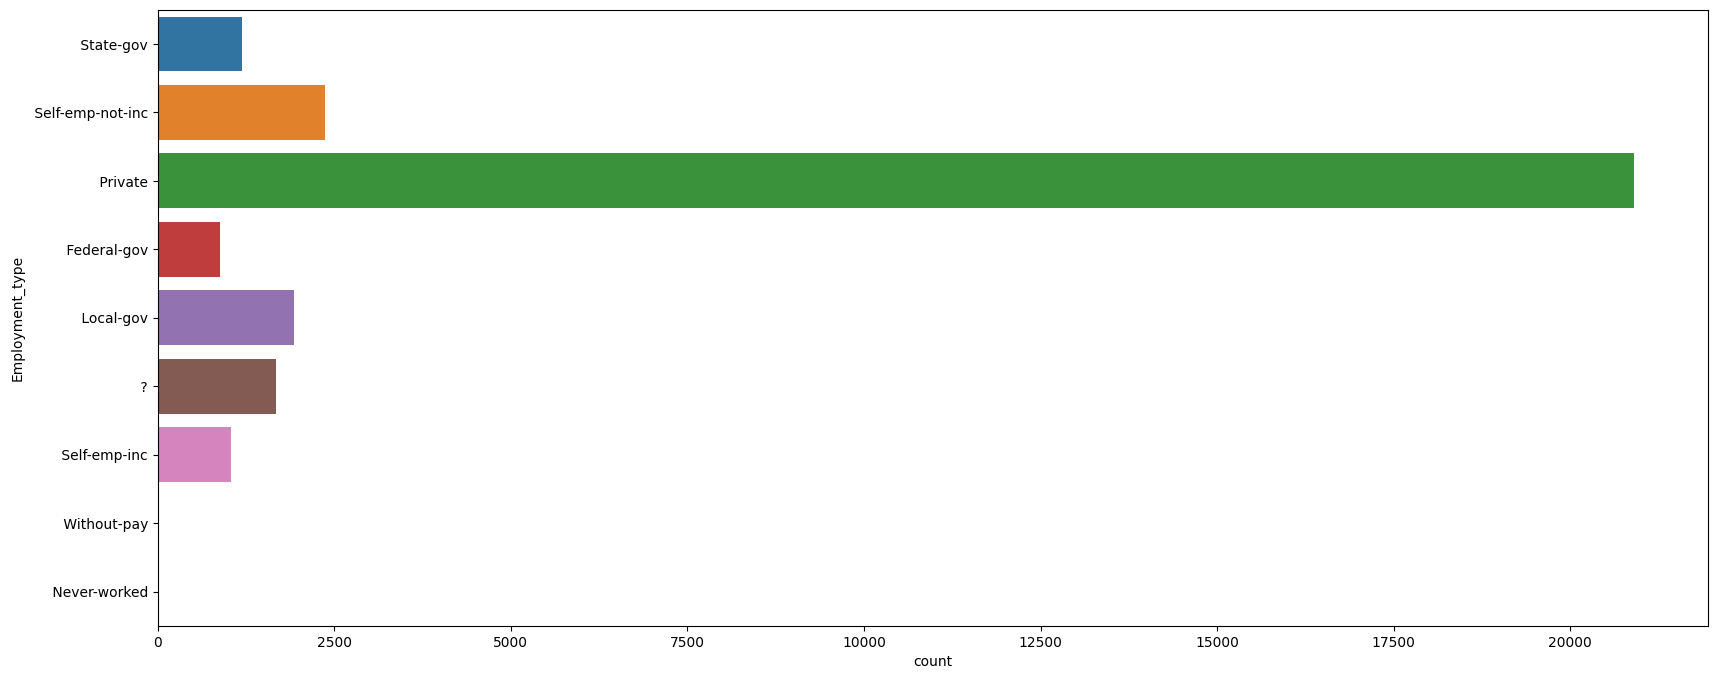

In [ ]:
plt.figure(figsize=(20,8))
sns.countplot(data=train_data, y="Employment_type");


The graph clearly illustrates that private employment is the predominant employment type, with a significantly larger representation compared to the without-pay and never-worked categories. In fact, the number of individuals falling into the without-pay and never-worked groups is notably smaller in comparison to the total dataset size.

In [ ]:
train_data['Employment_type'].value_counts()

 Private             20901
 Self-emp-not-inc     2363
 Local-gov            1928
 ?                    1677
 State-gov            1189
 Self-emp-inc         1037
 Federal-gov           887
 Without-pay            13
 Never-worked            5
Name: Employment_type, dtype: int64

Also from the table we can see that the number of unknown employment type is around 6% af a dataset size

In [ ]:
unique_work_type_list = train_data['Employment_type'].unique()

In [ ]:
unique_work_type_dict = { i : unique_work_type_list[i] for i in range(0, len(unique_work_type_list) ) }
unique_work_type_dict

{0: ' State-gov',
 1: ' Self-emp-not-inc',
 2: ' Private',
 3: ' Federal-gov',
 4: ' Local-gov',
 5: ' ?',
 6: ' Self-emp-inc',
 7: ' Without-pay',
 8: ' Never-worked'}

In [ ]:
work_type_int_list = []
for i in range(len(train_data['Employment_type'])):
  for j in range(len(unique_work_type_dict)):
      if train_data['Employment_type'][i] == unique_work_type_dict[j]:
         work_type_int_list.append(j)
work_type_int_list[:10]

[0, 1, 2, 2, 2, 2, 2, 1, 2, 2]

In [ ]:
train_data['Employment_type'][:10]

0            State-gov
1     Self-emp-not-inc
2              Private
3              Private
4              Private
5              Private
6              Private
7     Self-emp-not-inc
8              Private
9              Private
Name: Employment_type, dtype: object

In [ ]:
train_data['Employment_type_int'] = work_type_int_list

## Education

In [ ]:
train_data['Education'].unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
       ' Preschool', ' 12th'], dtype=object)

In [ ]:
train_data['Education'].value_counts()

 HS-grad         9692
 Some-college    6723
 Bachelors       4963
 Masters         1576
 Assoc-voc       1260
 11th            1084
 Assoc-acdm       969
 10th             858
 7th-8th          604
 Prof-school      525
 9th              472
 12th             386
 Doctorate        382
 5th-6th          310
 1st-4th          150
 Preschool         46
Name: Education, dtype: int64

Here we can see that the variation of Education types is too big with 16 variants which could affect the prediction and can be grouped into smaler number.

In [ ]:
train_data['Education']=train_data['Education'].replace(to_replace='Preschool', value='Leave School', regex=True)
train_data['Education']=train_data['Education'].replace('9th', 'Leave School', regex=True)
train_data['Education']=train_data['Education'].replace('10th', 'Leave School',regex=True)
train_data['Education']=train_data['Education'].replace('11th', 'Leave School',regex=True)
train_data['Education']=train_data['Education'].replace('12th', 'Leave School',regex=True)
train_data['Education']=train_data['Education'].replace('1st-4th', 'Leave School',regex=True)
train_data['Education']=train_data['Education'].replace('5th-6th', 'Leave School',regex=True)
train_data['Education']=train_data['Education'].replace('7th-8th', 'Leave School',regex=True)
train_data['Education']=train_data['Education'].replace('9th', 'Leave School',regex=True)
train_data['Education']=train_data['Education'].replace('HS-grad', 'HighGrad',regex=True)
train_data['Education']=train_data['Education'].replace('Some-college', 'College',regex=True)
train_data['Education']=train_data['Education'].replace('Assoc-acdm', 'College',regex=True)
train_data['Education']=train_data['Education'].replace('Masters', 'Masters',regex=True)
train_data['Education']=train_data['Education'].replace('Prof-school', 'Masters',regex=True)
train_data['Education']=train_data['Education'].replace('Doctorate', 'Doctorate',regex=True)

In [ ]:
train_data['Education'].value_counts()

 HighGrad        9692
 College         7692
 Bachelors       4963
 Leave School    3910
 Masters         2101
 Assoc-voc       1260
 Doctorate        382
Name: Education, dtype: int64

In [ ]:
unique_Education_type_list = train_data['Education'].unique()

In [ ]:
unique_Education_type_dict = { i : unique_Education_type_list[i] for i in range(0, len(unique_Education_type_list) ) }
unique_Education_type_dict

{0: ' Bachelors',
 1: ' HighGrad',
 2: ' Leave School',
 3: ' Masters',
 4: ' College',
 5: ' Assoc-voc',
 6: ' Doctorate'}

In [ ]:
Education_type_int_list = []
for i in range(len(train_data['Education'])):
  for j in range(len(unique_Education_type_dict)):
      if train_data['Education'][i] == unique_Education_type_dict[j]:
         Education_type_int_list.append(j)
Education_type_int_list[:10]

[0, 0, 1, 2, 0, 3, 2, 1, 3, 0]

In [ ]:
train_data['Education'][:10]

0        Bachelors
1        Bachelors
2         HighGrad
3     Leave School
4        Bachelors
5          Masters
6     Leave School
7         HighGrad
8          Masters
9        Bachelors
Name: Education, dtype: object

In [ ]:
train_data['Education_type_int'] = Education_type_int_list

In [ ]:
train_data.head(5)

,Age,Employment_type,Weighting,Education,Schooling,Marital_status,Employment_area,Partnership,Ethnicity,Gender,Gains_financial,Losses_financial,Weekly_working_t,Country,Income,gender_int,Employment_type_int,Education_type_int
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,0,0,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,0,1,0
2,38,Private,215646,HighGrad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,0,2,1
3,53,Private,234721,Leave School,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,0,2,2
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,1,2,0


## Marital_status

In [ ]:
train_data['Marital_status'].unique()

array([' Never-married', ' Married-civ-spouse', ' Divorced',
       ' Married-spouse-absent', ' Separated', ' Married-AF-spouse',
       ' Widowed'], dtype=object)

In [ ]:
unique_Marital_status_list = train_data['Marital_status'].unique()

In [ ]:
unique_Marital_status_dict = { i : unique_Marital_status_list[i] for i in range(0, len(unique_Marital_status_list) ) }
unique_Marital_status_dict

{0: ' Never-married',
 1: ' Married-civ-spouse',
 2: ' Divorced',
 3: ' Married-spouse-absent',
 4: ' Separated',
 5: ' Married-AF-spouse',
 6: ' Widowed'}

In [ ]:
Marital_status_int_list = []
for i in range(len(train_data['Marital_status'])):
  for j in range(len(unique_Marital_status_dict)):
      if train_data['Marital_status'][i] == unique_Marital_status_dict[j]:
         Marital_status_int_list.append(j)
Marital_status_int_list[:10]

[0, 1, 2, 1, 1, 1, 3, 1, 0, 1]

In [ ]:
train_data['Marital_status'][:10]

0             Never-married
1        Married-civ-spouse
2                  Divorced
3        Married-civ-spouse
4        Married-civ-spouse
5        Married-civ-spouse
6     Married-spouse-absent
7        Married-civ-spouse
8             Never-married
9        Married-civ-spouse
Name: Marital_status, dtype: object

In [ ]:
train_data['Marital_status_int'] = Marital_status_int_list

In [ ]:
train_data.head(5)

,Age,Employment_type,Weighting,Education,Schooling,Marital_status,Employment_area,Partnership,Ethnicity,Gender,Gains_financial,Losses_financial,Weekly_working_t,Country,Income,gender_int,Employment_type_int,Education_type_int,Marital_status_int
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,0,0,0,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,0,1,0,1
2,38,Private,215646,HighGrad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,0,2,1,2
3,53,Private,234721,Leave School,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,0,2,2,1
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,1,2,0,1


## Employment_area

In [ ]:
train_data['Employment_area'].unique()

array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
       ' Prof-specialty', ' Other-service', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' ?', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

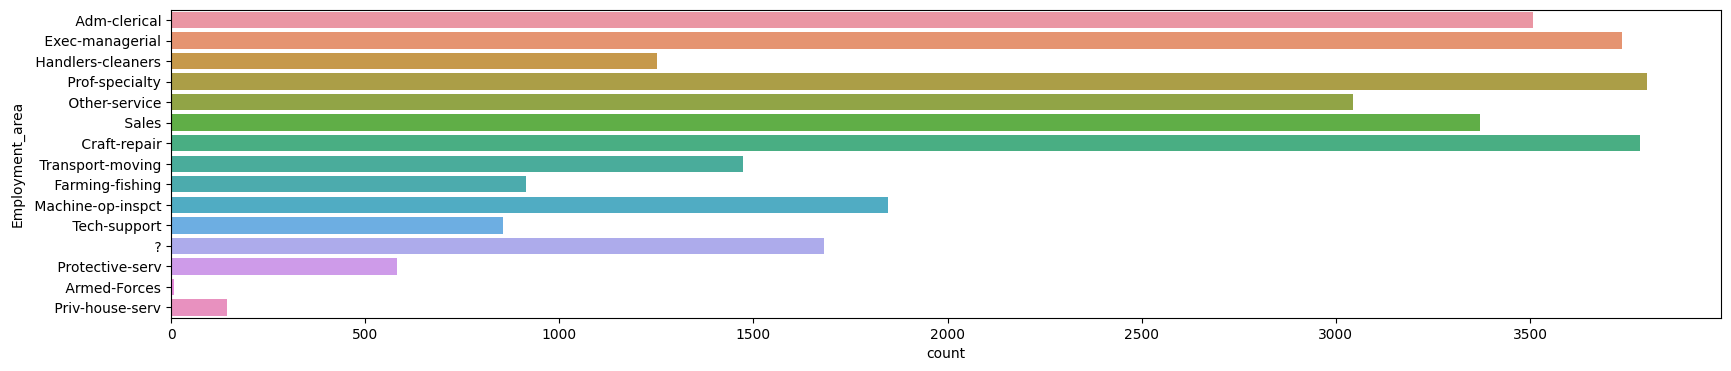

In [ ]:
plt.figure(figsize=(20,4))
sns.countplot(y='Employment_area', data=train_data);

In [ ]:
train_data['Employment_area'].value_counts()

 Prof-specialty       3802
 Craft-repair         3784
 Exec-managerial      3736
 Adm-clerical         3507
 Sales                3370
 Other-service        3044
 Machine-op-inspct    1846
 ?                    1682
 Transport-moving     1473
 Handlers-cleaners    1252
 Farming-fishing       913
 Tech-support          856
 Protective-serv       583
 Priv-house-serv       144
 Armed-Forces            8
Name: Employment_area, dtype: int64

Here we can see that for the Employment area there are 1682 missing values which is around 5% of the dataset

## Distribution of employment areas for known income

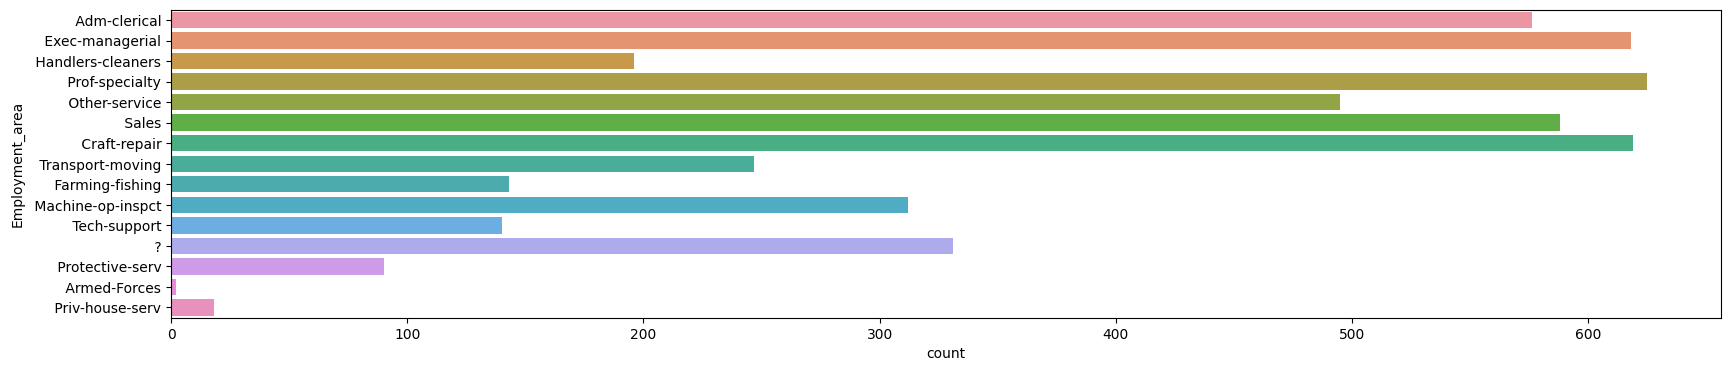

In [ ]:
plt.figure(figsize=(20,4))
sns.countplot(y='Employment_area', data=train_data[(train_data["Income"]!=' ?')]);

## Distribution of employment areas for uknown income

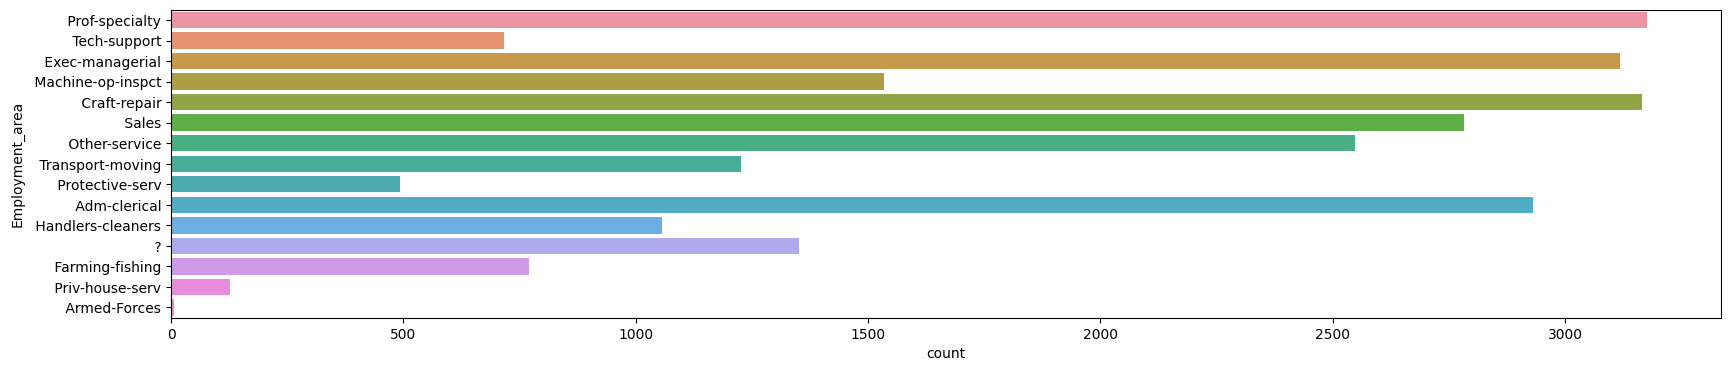

In [ ]:
plt.figure(figsize=(20,4))
sns.countplot(y='Employment_area', data=train_data[(train_data["Income"]==' ?')]);

In [ ]:
unique_Employment_area_list = train_data['Employment_area'].unique()

In [ ]:
unique_Employment_area_dict = { i : unique_Employment_area_list[i] for i in range(0, len(unique_Employment_area_list) ) }
unique_Employment_area_dict

{0: ' Adm-clerical',
 1: ' Exec-managerial',
 2: ' Handlers-cleaners',
 3: ' Prof-specialty',
 4: ' Other-service',
 5: ' Sales',
 6: ' Craft-repair',
 7: ' Transport-moving',
 8: ' Farming-fishing',
 9: ' Machine-op-inspct',
 10: ' Tech-support',
 11: ' ?',
 12: ' Protective-serv',
 13: ' Armed-Forces',
 14: ' Priv-house-serv'}

In [ ]:
Employment_area_int_list = []
for i in range(len(train_data['Employment_area'])):
  for j in range(len(unique_Employment_area_dict)):
      if train_data['Employment_area'][i] == unique_Employment_area_dict[j]:
         Employment_area_int_list.append(j)
Employment_area_int_list[:10]

[0, 1, 2, 2, 3, 1, 4, 1, 3, 1]

In [ ]:
train_data['Employment_area'][:10]

0          Adm-clerical
1       Exec-managerial
2     Handlers-cleaners
3     Handlers-cleaners
4        Prof-specialty
5       Exec-managerial
6         Other-service
7       Exec-managerial
8        Prof-specialty
9       Exec-managerial
Name: Employment_area, dtype: object

In [ ]:
train_data['Employment_area_int'] = Employment_area_int_list

## Partnership

In [ ]:
train_data['Partnership'].unique()

array([' Not-in-family', ' Husband', ' Wife', ' Own-child', ' Unmarried',
       ' Other-relative'], dtype=object)

In [ ]:
unique_Partnership_list = train_data['Partnership'].unique()

In [ ]:
unique_Partnership_dict = { i : unique_Partnership_list[i] for i in range(0, len(unique_Partnership_list) ) }
unique_Partnership_dict

{0: ' Not-in-family',
 1: ' Husband',
 2: ' Wife',
 3: ' Own-child',
 4: ' Unmarried',
 5: ' Other-relative'}

In [ ]:
Partnership_int_list = []
for i in range(len(train_data['Partnership'])):
  for j in range(len(unique_Partnership_dict)):
      if train_data['Partnership'][i] == unique_Partnership_dict[j]:
         Partnership_int_list.append(j)
Partnership_int_list[:10]

[0, 1, 0, 1, 2, 2, 0, 1, 0, 1]

In [ ]:
train_data['Partnership'][:10]

0     Not-in-family
1           Husband
2     Not-in-family
3           Husband
4              Wife
5              Wife
6     Not-in-family
7           Husband
8     Not-in-family
9           Husband
Name: Partnership, dtype: object

In [ ]:
train_data['Partnership_int'] = Partnership_int_list

## Ethnicity

In [ ]:
train_data['Ethnicity'].unique()

array([' White', ' Black', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo',
       ' Other'], dtype=object)

In [ ]:
train_data['Ethnicity'].value_counts()

 White                 25636
 Black                  2873
 Asian-Pac-Islander      953
 Amer-Indian-Eskimo      288
 Other                   250
Name: Ethnicity, dtype: int64

In [ ]:
unique_Ethnicity_list = train_data['Ethnicity'].unique()

In [ ]:
unique_Ethnicity_dict = { i : unique_Ethnicity_list[i] for i in range(0, len(unique_Ethnicity_list) ) }
unique_Ethnicity_dict

{0: ' White',
 1: ' Black',
 2: ' Asian-Pac-Islander',
 3: ' Amer-Indian-Eskimo',
 4: ' Other'}

In [ ]:
Ethnicity_int_list = []
for i in range(len(train_data['Ethnicity'])):
  for j in range(len(unique_Ethnicity_dict)):
      if train_data['Ethnicity'][i] == unique_Ethnicity_dict[j]:
         Ethnicity_int_list.append(j)
Ethnicity_int_list[:10]

[0, 0, 0, 1, 1, 0, 1, 0, 0, 0]

In [ ]:
train_data['Ethnicity'][:10]

0     White
1     White
2     White
3     Black
4     Black
5     White
6     Black
7     White
8     White
9     White
Name: Ethnicity, dtype: object

In [ ]:
train_data['Ethnicity_int'] = Ethnicity_int_list

In [ ]:
train_data.head(5)

,Age,Employment_type,Weighting,Education,Schooling,Marital_status,Employment_area,Partnership,Ethnicity,Gender,...,Weekly_working_t,Country,Income,gender_int,Employment_type_int,Education_type_int,Marital_status_int,Employment_area_int,Partnership_int,Ethnicity_int
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,...,40,United-States,<=50K,0,0,0,0,0,0,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,...,13,United-States,<=50K,0,1,0,1,1,1,0
2,38,Private,215646,HighGrad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,...,40,United-States,<=50K,0,2,1,2,2,0,0
3,53,Private,234721,Leave School,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,...,40,United-States,<=50K,0,2,2,1,2,1,1
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,...,40,Cuba,<=50K,1,2,0,1,3,2,1


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Age                  30000 non-null  int64 
 1   Employment_type      30000 non-null  object
 2   Weighting            30000 non-null  int64 
 3   Education            30000 non-null  object
 4   Schooling            30000 non-null  int64 
 5   Marital_status       30000 non-null  object
 6   Employment_area      30000 non-null  object
 7   Partnership          30000 non-null  object
 8   Ethnicity            30000 non-null  object
 9   Gender               30000 non-null  object
 10  Gains_financial      30000 non-null  int64 
 11  Losses_financial     30000 non-null  int64 
 12  Weekly_working_t     30000 non-null  int64 
 13  Country              30000 non-null  object
 14  Income               30000 non-null  object
 15  gender_int           30000 non-null  int64 
 16  Empl

## Country

In [ ]:
train_data['Country'].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [ ]:
train_data['Country'].value_counts()

 United-States                 26871
 Mexico                          602
 ?                               539
 Philippines                     177
 Germany                         122
 Canada                          115
 Puerto-Rico                     112
 El-Salvador                      96
 India                            94
 England                          87
 Cuba                             87
 South                            76
 Jamaica                          73
 China                            68
 Vietnam                          62
 Italy                            62
 Dominican-Republic               62
 Guatemala                        60
 Japan                            56
 Poland                           56
 Columbia                         55
 Taiwan                           48
 Haiti                            40
 Iran                             40
 Portugal                         33
 Nicaragua                        32
 Peru                             28
 

The number of missing values for the countries is 539

In [ ]:
unique_Country_list = train_data['Country'].unique()

In [ ]:
unique_Country_dict = { i : unique_Country_list[i] for i in range(0, len(unique_Country_list) ) }
unique_Country_dict

{0: ' United-States',
 1: ' Cuba',
 2: ' Jamaica',
 3: ' India',
 4: ' ?',
 5: ' Mexico',
 6: ' South',
 7: ' Puerto-Rico',
 8: ' Honduras',
 9: ' England',
 10: ' Canada',
 11: ' Germany',
 12: ' Iran',
 13: ' Philippines',
 14: ' Italy',
 15: ' Poland',
 16: ' Columbia',
 17: ' Cambodia',
 18: ' Thailand',
 19: ' Ecuador',
 20: ' Laos',
 21: ' Taiwan',
 22: ' Haiti',
 23: ' Portugal',
 24: ' Dominican-Republic',
 25: ' El-Salvador',
 26: ' France',
 27: ' Guatemala',
 28: ' China',
 29: ' Japan',
 30: ' Yugoslavia',
 31: ' Peru',
 32: ' Outlying-US(Guam-USVI-etc)',
 33: ' Scotland',
 34: ' Trinadad&Tobago',
 35: ' Greece',
 36: ' Nicaragua',
 37: ' Vietnam',
 38: ' Hong',
 39: ' Ireland',
 40: ' Hungary',
 41: ' Holand-Netherlands'}

In [ ]:
Country_int_list = []
for i in range(len(train_data['Country'])):
  for j in range(len(unique_Country_dict)):
      if train_data['Country'][i] == unique_Country_dict[j]:
         Country_int_list.append(j)
Country_int_list[:10]

[0, 0, 0, 0, 1, 0, 2, 0, 0, 0]

In [ ]:
train_data['Country'][:10]

0     United-States
1     United-States
2     United-States
3     United-States
4              Cuba
5     United-States
6           Jamaica
7     United-States
8     United-States
9     United-States
Name: Country, dtype: object

In [ ]:
train_data['Country_int'] = Country_int_list

## And finally Income

In [ ]:
train_data['Income'].unique()

array([' <=50K', ' >50K', ' ?'], dtype=object)

In [ ]:
train_data['Income'].value_counts()

 ?        25000
 <=50K     3779
 >50K      1221
Name: Income, dtype: int64

### Dataframe with predicting data of unknown income

In [ ]:
predicting_data = train_data[(train_data['Income'] == ' ?')]
predicting_data.head()

,Age,Employment_type,Weighting,Education,Schooling,Marital_status,Employment_area,Partnership,Ethnicity,Gender,...,Country,Income,gender_int,Employment_type_int,Education_type_int,Marital_status_int,Employment_area_int,Partnership_int,Ethnicity_int,Country_int
5000,47,Self-emp-inc,79627,Masters,15,Divorced,Prof-specialty,Not-in-family,White,Male,...,United-States,?,0,6,3,2,3,0,0,0
5001,55,Private,151474,Bachelors,13,Never-married,Tech-support,Other-relative,White,Female,...,United-States,?,1,2,0,0,10,5,0,0
5002,26,Private,132661,HighGrad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,...,United-States,?,1,2,1,1,1,2,0,0
5003,28,Private,161674,HighGrad,9,Never-married,Machine-op-inspct,Unmarried,White,Female,...,United-States,?,1,2,1,0,9,4,0,0
5004,36,Private,62346,HighGrad,9,Married-civ-spouse,Craft-repair,Husband,Black,Male,...,United-States,?,0,2,1,1,6,1,1,0


In [ ]:
predicting_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25000 entries, 5000 to 29999
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Age                  25000 non-null  int64 
 1   Employment_type      25000 non-null  object
 2   Weighting            25000 non-null  int64 
 3   Education            25000 non-null  object
 4   Schooling            25000 non-null  int64 
 5   Marital_status       25000 non-null  object
 6   Employment_area      25000 non-null  object
 7   Partnership          25000 non-null  object
 8   Ethnicity            25000 non-null  object
 9   Gender               25000 non-null  object
 10  Gains_financial      25000 non-null  int64 
 11  Losses_financial     25000 non-null  int64 
 12  Weekly_working_t     25000 non-null  int64 
 13  Country              25000 non-null  object
 14  Income               25000 non-null  object
 15  gender_int           25000 non-null  int64 
 16  E

### Dataframe with training data of size 5000

In [ ]:
train_data_new = train_data[(train_data['Income'] != ' ?')]
train_data_new.head()

,Age,Employment_type,Weighting,Education,Schooling,Marital_status,Employment_area,Partnership,Ethnicity,Gender,...,Country,Income,gender_int,Employment_type_int,Education_type_int,Marital_status_int,Employment_area_int,Partnership_int,Ethnicity_int,Country_int
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,...,United-States,<=50K,0,0,0,0,0,0,0,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,...,United-States,<=50K,0,1,0,1,1,1,0,0
2,38,Private,215646,HighGrad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,...,United-States,<=50K,0,2,1,2,2,0,0,0
3,53,Private,234721,Leave School,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,...,United-States,<=50K,0,2,2,1,2,1,1,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,...,Cuba,<=50K,1,2,0,1,3,2,1,1


In [ ]:
train_data_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Age                  5000 non-null   int64 
 1   Employment_type      5000 non-null   object
 2   Weighting            5000 non-null   int64 
 3   Education            5000 non-null   object
 4   Schooling            5000 non-null   int64 
 5   Marital_status       5000 non-null   object
 6   Employment_area      5000 non-null   object
 7   Partnership          5000 non-null   object
 8   Ethnicity            5000 non-null   object
 9   Gender               5000 non-null   object
 10  Gains_financial      5000 non-null   int64 
 11  Losses_financial     5000 non-null   int64 
 12  Weekly_working_t     5000 non-null   int64 
 13  Country              5000 non-null   object
 14  Income               5000 non-null   object
 15  gender_int           5000 non-null   int64 
 16  Employ

In [ ]:
Income_int = [0 if i==' <=50K' else 1 for i in train_data_new['Income']]

In [ ]:
Income_int.count(0)

3779

In [ ]:
Income_int.count(1)

1221

In [ ]:
train_data_new['Income_int'] = Income_int

In [ ]:
train_data_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Age                  5000 non-null   int64 
 1   Employment_type      5000 non-null   object
 2   Weighting            5000 non-null   int64 
 3   Education            5000 non-null   object
 4   Schooling            5000 non-null   int64 
 5   Marital_status       5000 non-null   object
 6   Employment_area      5000 non-null   object
 7   Partnership          5000 non-null   object
 8   Ethnicity            5000 non-null   object
 9   Gender               5000 non-null   object
 10  Gains_financial      5000 non-null   int64 
 11  Losses_financial     5000 non-null   int64 
 12  Weekly_working_t     5000 non-null   int64 
 13  Country              5000 non-null   object
 14  Income               5000 non-null   object
 15  gender_int           5000 non-null   int64 
 16  Employ

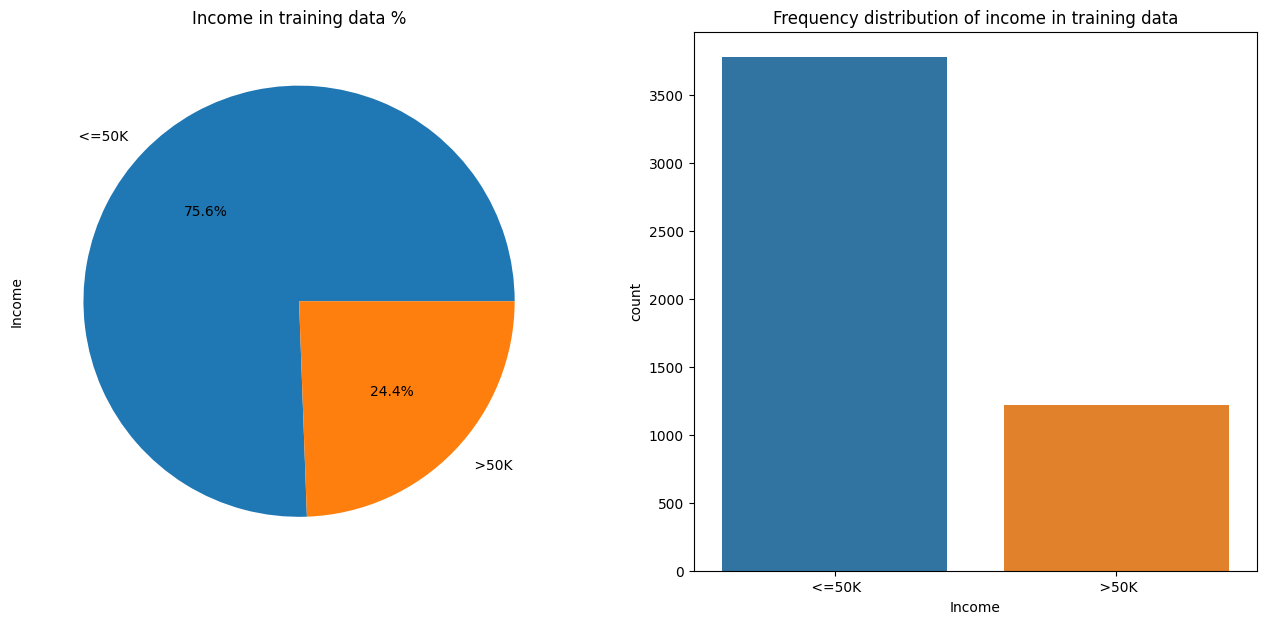

In [ ]:
f,ax=plt.subplots(1,2,figsize=(16,7))

ax[0] = train_data_new['Income'].value_counts().plot.pie(explode=[0,0], autopct='%1.1f%%', ax=ax[0])
ax[0].set_title('Income in training data %')

ax[1] = sns.countplot(x="Income", data=train_data_new)
ax[1].set_title("Frequency distribution of income in training data")

plt.show()

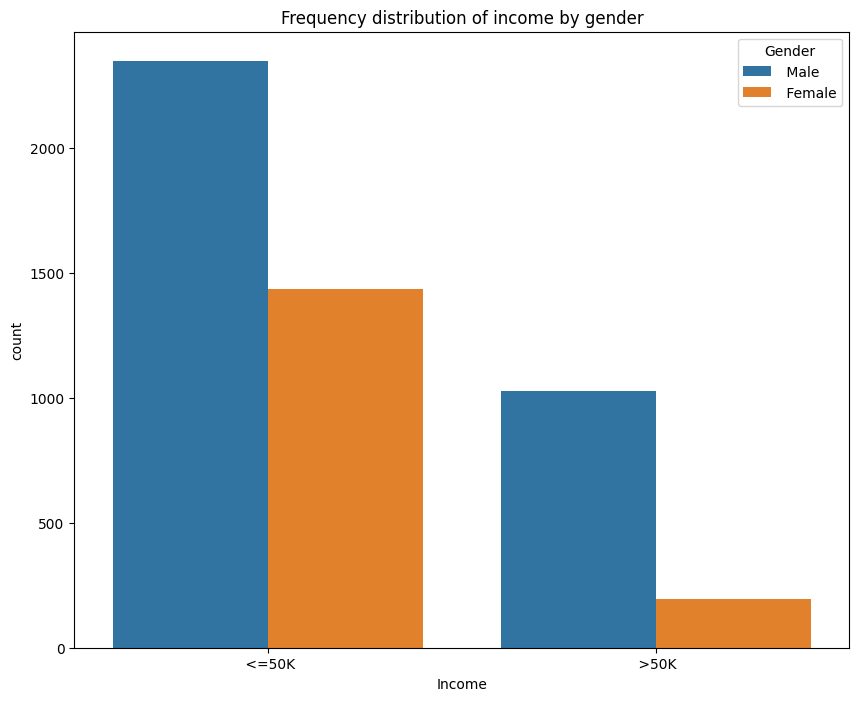

In [ ]:
f, ax = plt.subplots(figsize=(10, 8))
ax = sns.countplot(x="Income", hue="Gender", data=train_data_new)
ax.set_title("Frequency distribution of income by gender")
plt.show()

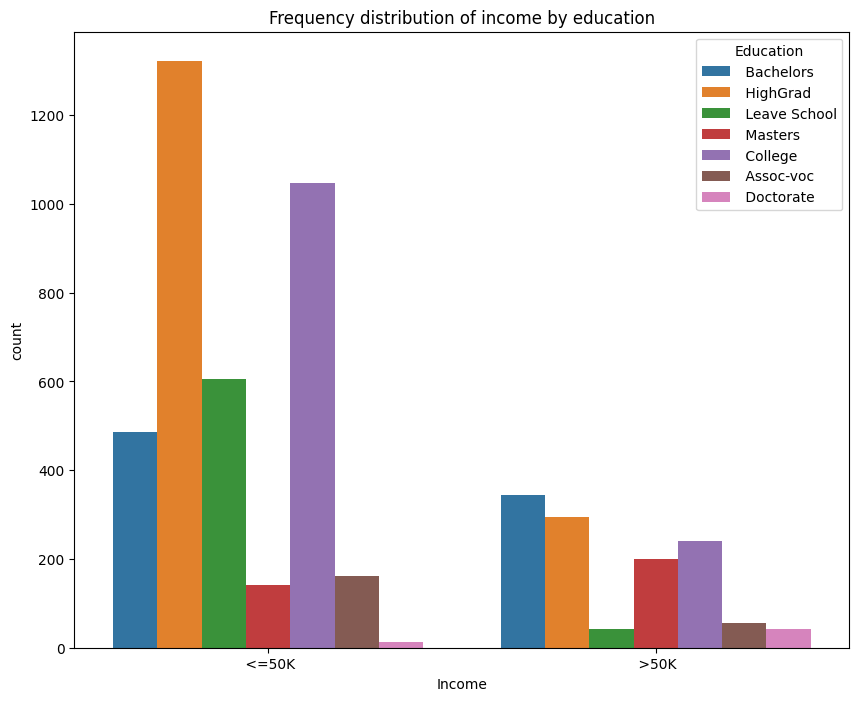

In [ ]:
f, ax = plt.subplots(figsize=(10, 8))
ax = sns.countplot(x="Income", hue="Education", data=train_data_new)
ax.set_title("Frequency distribution of income by education")
plt.show()

# Let's create a new training dataset with only numerical values

In [ ]:
train_data_int = train_data_new.drop(columns = ['Employment_type',	'Education', 'Marital_status', 'Employment_area', 'Partnership', 'Ethnicity', 'Gender', 'Country', 'Income'])

In [ ]:
train_data_int.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Age                  5000 non-null   int64
 1   Weighting            5000 non-null   int64
 2   Schooling            5000 non-null   int64
 3   Gains_financial      5000 non-null   int64
 4   Losses_financial     5000 non-null   int64
 5   Weekly_working_t     5000 non-null   int64
 6   gender_int           5000 non-null   int64
 7   Employment_type_int  5000 non-null   int64
 8   Education_type_int   5000 non-null   int64
 9   Marital_status_int   5000 non-null   int64
 10  Employment_area_int  5000 non-null   int64
 11  Partnership_int      5000 non-null   int64
 12  Ethnicity_int        5000 non-null   int64
 13  Country_int          5000 non-null   int64
 14  Income_int           5000 non-null   int64
dtypes: int64(15)
memory usage: 625.0 KB


## Checking missing values for initial numerical columns

In [ ]:
train_data_int["Age"].unique()

array([39, 50, 38, 53, 28, 37, 49, 52, 31, 42, 30, 23, 32, 40, 34, 25, 43,
       54, 35, 59, 56, 19, 20, 45, 22, 48, 21, 24, 57, 44, 41, 29, 18, 47,
       46, 36, 79, 27, 67, 33, 76, 17, 55, 61, 70, 64, 71, 68, 66, 51, 58,
       26, 60, 90, 75, 65, 77, 62, 63, 80, 72, 74, 69, 73, 81, 78, 88, 82,
       83])

In [ ]:
train_data_int["Weighting"].isna().sum()

0

In [ ]:
train_data_int["Schooling"].unique()

array([13,  9,  7, 14,  5, 10, 12, 11,  4, 16, 15,  3,  6,  2,  1,  8])

In [ ]:
train_data_int["Gains_financial"].unique()

array([ 2174,     0, 14084,  5178,  5013,  2407, 14344, 15024,  7688,
       34095,  4064,  4386,  7298,  1409,  3674,  1055,  3464,  2050,
        2176,   594, 20051,  6849,  4101,  1111,  8614,  3411,  2597,
       25236,  4650,  9386,  2463,  3103, 10605,  2964,  3325,  2580,
        3471,  4865, 99999,  6514,  1471,  2329,  2105,  2885, 25124,
       10520,  2202,  2961, 27828,  6767,  2228,  1506, 13550,  2635,
        5556,  4787,  3781,  3137,  3818,  3942,   914,   401,  2829,
        2977,  4934,  2062,  2354,  5455, 15020,  1424,  3273, 22040,
        4416,  3908, 10566,   991,  4931,  1086,  7430,  6497,   114,
        7896,  2346])

In [ ]:
train_data_int["Gains_financial"].value_counts()

0        4579
15024      65
7688       48
7298       36
99999      22
         ... 
5556        1
3781        1
3818        1
3942        1
2346        1
Name: Gains_financial, Length: 83, dtype: int64

In [ ]:
len(train_data_int["Gains_financial"])

5000

This data is very imbalanced and doesn't bring benefit into dataset and could be dropped

In [ ]:
train_data_int["Losses_financial"].unique()

array([   0, 2042, 1408, 1902, 1573, 1887, 1719, 1762, 1564, 2179, 1816,
       1980, 1977, 1876, 1340, 2206, 1741, 1485, 2339, 2415, 1380, 1721,
       2051, 2377, 1669, 2352, 1672,  653, 2392, 1504, 2001, 1590, 1651,
       1628, 1848, 1740, 2002, 1579, 2258, 1602,  419, 2547, 2174, 2205,
       1726, 2444, 1138, 2238,  625,  213, 1539,  880, 1668, 1092, 1594])

In [ ]:
train_data_int["Losses_financial"].value_counts()

0       4745
1902      40
1977      30
1887      24
2415      10
1485       9
1848       9
1590       7
1741       7
1672       6
1719       6
1762       6
1564       6
1876       6
1740       5
1628       5
1980       5
1669       5
2002       4
2392       4
2339       4
1408       4
1579       3
2258       3
2001       3
2179       3
1340       3
1602       2
625        2
2051       2
1504       2
2352       2
2377       2
1721       2
1380       2
2206       2
1816       2
1668       1
880        1
2444       1
1539       1
213        1
1092       1
2238       1
1138       1
653        1
1726       1
2205       1
2174       1
2547       1
419        1
1651       1
2042       1
1573       1
1594       1
Name: Losses_financial, dtype: int64

This data is very imbalanced too and doesn't bring any beneficial information into dataset and could be dropped

In [ ]:
train_data_int["Weekly_working_t"].value_counts()

40    2347
50     455
45     274
60     246
35     203
      ... 
19       1
68       1
31       1
51       1
77       1
Name: Weekly_working_t, Length: 74, dtype: int64

# Correlation Anlysis

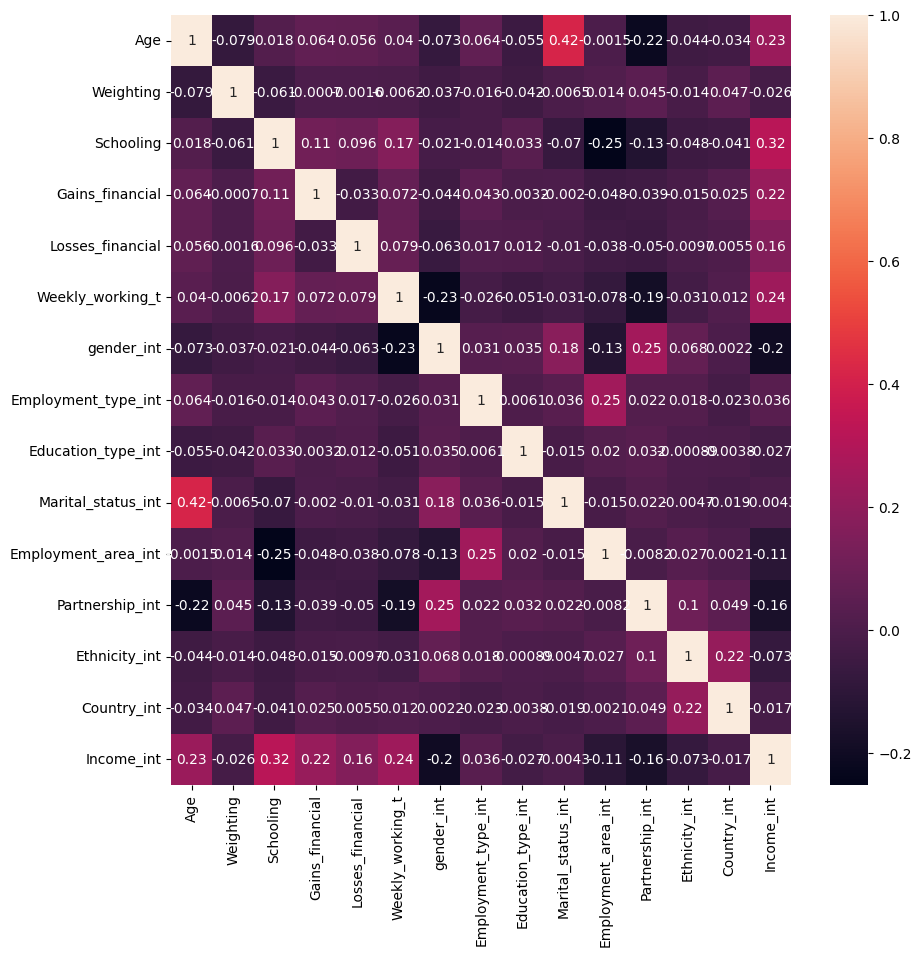

In [ ]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

corrMatrix = train_data_int.corr()

plt.figure(figsize = (10,10))
sn.heatmap(corrMatrix, annot=True)
plt.show()

**Highly correlated data can significantly influence the prediction of machine learning models for several reasons:**

1) **Multicollinearity:** When two or more variables in a dataset are strongly correlated, it becomes difficult for the model to distinguish the individual impact of each variable on the target variable. This can lead to instability in coefficient estimates in linear models, making it challenging to interpret the model's feature importance.

2) **Overfitting:** In machine learning, overfitting occurs when a model captures noise or random fluctuations in the data rather than the underlying patterns. **Highly correlated variables can exacerbate overfitting because the model may assign too much importance to similar features, making it less able to generalize to new, unseen data.**

3) **Redundancy:** Highly correlated features often contain redundant information. Redundant features don't add new information to the model but can increase the computational complexity. This can slow down training and inference times without improving predictive performance.

4) **Model Interpretability:** Interpreting a model with highly correlated features becomes challenging because it's hard to attribute the effect of each feature on the prediction. This can be especially problematic in applications where interpretability is crucial, such as healthcare or finance.

5) **Increased Model Complexity:** Correlated features can make models more complex than necessary. Complex models are harder to train, require more data, and are more prone to **overfitting.** They can also be computationally expensive.




**To mitigate the impact of highly correlated data, it's essential to perform feature selection or feature engineering.**

**1) Way:** This may involve removing one of the correlated features, transforming them, or

**2) Way:** using dimensionality reduction techniques like Principal Component Analysis (PCA). The goal is to retain the most informative features while reducing redundancy and multicollinearity. Additionally, regularization techniques in some machine learning algorithms can help reduce the model's sensitivity to correlated features.

In our training dataset there are multiple highly correlated columns:

1) Age: Partnership, Marital status

2) Schooling: Employment area, **Income**

3) Weekly working time: partnership, gender, **Income**

4) Gender: Partnership, weekly working time, **Income**

5) Employment type: employment area

**6) Income: Age, Schooling, weekly working type, gender, Partnership**

In [ ]:
train_data_int.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Age                  5000 non-null   int64
 1   Weighting            5000 non-null   int64
 2   Schooling            5000 non-null   int64
 3   Gains_financial      5000 non-null   int64
 4   Losses_financial     5000 non-null   int64
 5   Weekly_working_t     5000 non-null   int64
 6   gender_int           5000 non-null   int64
 7   Employment_type_int  5000 non-null   int64
 8   Education_type_int   5000 non-null   int64
 9   Marital_status_int   5000 non-null   int64
 10  Employment_area_int  5000 non-null   int64
 11  Partnership_int      5000 non-null   int64
 12  Ethnicity_int        5000 non-null   int64
 13  Country_int          5000 non-null   int64
 14  Income_int           5000 non-null   int64
dtypes: int64(15)
memory usage: 625.0 KB


In [ ]:
train_data_int.describe()

,Age,Weighting,Schooling,Gains_financial,Losses_financial,Weekly_working_t,gender_int,Employment_type_int,Education_type_int,Marital_status_int,Employment_area_int,Partnership_int,Ethnicity_int,Country_int,Income_int
count,5000.000000,5.000000e+03,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,38.600200,1.907684e+05,10.079600,1033.640200,93.696800,40.519000,0.32580,2.352200,2.103000,1.089800,4.719800,1.543400,0.218200,1.296200,0.244200
std,13.594695,1.063596e+05,2.534906,7051.802077,410.801418,12.109193,0.46872,1.258122,1.627796,1.270299,3.404821,1.442682,0.602878,4.993822,0.429655
min,17.000000,1.930200e+04,1.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,1.176958e+05,9.000000,0.000000,0.000000,40.000000,0.00000,2.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,1.794750e+05,10.000000,0.000000,0.000000,40.000000,0.00000,2.000000,2.000000,1.000000,4.000000,1.000000,0.000000,0.000000,0.000000
75%,47.000000,2.416575e+05,12.000000,0.000000,0.000000,45.000000,1.00000,2.000000,4.000000,1.000000,7.000000,3.000000,0.000000,0.000000,0.000000
max,90.000000,1.033222e+06,16.000000,99999.000000,2547.000000,99.000000,1.00000,7.000000,6.000000,6.000000,14.000000,5.000000,4.000000,39.000000,1.000000


# Training

As far as we have very small datatset for training, I will use machine learning algorithms that are better suited for small datasets e.g that have lower model complexity and are less prone to overfitting.

In [ ]:
from sklearn.cluster import KMeans
from matplotlib import cm
from sklearn.metrics import silhouette_samples
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split


#importing models
from sklearn.linear_model import Perceptron
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

## Approach 1:
 **Training models on dataset of 5000 without removing imbalanced data or dealing with correlated columns**

In [ ]:
y = train_data_int["Income_int"]
X = train_data_int.drop(["Income_int"], axis=1)
X.head()

,Age,Weighting,Schooling,Gains_financial,Losses_financial,Weekly_working_t,gender_int,Employment_type_int,Education_type_int,Marital_status_int,Employment_area_int,Partnership_int,Ethnicity_int,Country_int
0,39,77516,13,2174,0,40,0,0,0,0,0,0,0,0
1,50,83311,13,0,0,13,0,1,0,1,1,1,0,0
2,38,215646,9,0,0,40,0,2,1,2,2,0,0,0
3,53,234721,7,0,0,40,0,2,2,1,2,1,1,0
4,28,338409,13,0,0,40,1,2,0,1,3,2,1,1


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

## Perceptron

In [ ]:
ppn = Perceptron(eta0=1, random_state=1)
ppn.fit(X_train, y_train)

Perceptron(eta0=1, random_state=1)

In [ ]:
y_pred = ppn.predict(X_test)
accuracy_score(y_pred,y_test)

0.761

In [ ]:
approach_eval_1=pd.DataFrame()
approach_eval_1["Accuracy"] = [accuracy_score(y_pred,y_test)]
approach_eval_1["F1"] = [f1_score(y_pred,y_test)]
approach_eval_1["Precision"] = [precision_score(y_pred,y_test)]
approach_eval_1["Recall"] = [recall_score(y_pred,y_test)]
approach_eval_1.rename(index={0: "Perceptron"})

,Accuracy,F1,Precision,Recall
Perceptron,0.761,0.111524,0.059055,1.0


##  Gaussian Naive Bayes

In [ ]:
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
y_pred = gaussian.predict(X_test)
accuracy_score(y_pred,y_test)

0.79

In [ ]:
gaussian_scores = {"Accuracy": accuracy_score(y_pred,y_test),
                   "F1": f1_score(y_pred,y_test),
                   "Precision": precision_score(y_pred,y_test),
                   "Recall": recall_score(y_pred,y_test)}
approach_eval_1 = approach_eval_1.append(gaussian_scores, ignore_index = True)

In [ ]:
approach_eval_1

,Accuracy,F1,Precision,Recall
0,0.761,0.111524,0.059055,1.000000
1,0.790,0.413408,0.291339,0.711538


## Support Vector Classifier

In [ ]:
from sklearn.svm import SVC
svc = SVC(gamma=0.22)
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
accuracy_score(y_pred,y_test)

0.746

In [ ]:
svc_scores = {"Accuracy": accuracy_score(y_pred,y_test),
              "F1": f1_score(y_pred,y_test),
              "Precision": precision_score(y_pred,y_test),
              "Recall": recall_score(y_pred,y_test)}
approach_eval_1 = approach_eval_1.append(svc_scores, ignore_index = True)

## Logistic Regression

In [ ]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
accuracy_score(y_pred,y_test)

0.789

In [ ]:
logreg_scores = {"Accuracy": accuracy_score(y_pred,y_test),
                 "F1": f1_score(y_pred,y_test),
                 "Precision": precision_score(y_pred,y_test),
                 "Recall": recall_score(y_pred,y_test)}
approach_eval_1 = approach_eval_1.append(logreg_scores, ignore_index = True)

## Random Forest Classifier

In [ ]:
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)
accuracy_score(y_pred,y_test)

0.837

In [ ]:
random_forest_scores = {"Accuracy": accuracy_score(y_pred,y_test),
                        "F1": f1_score(y_pred,y_test),
                        "Precision": precision_score(y_pred,y_test),
                        "Recall": recall_score(y_pred,y_test)}
approach_eval_1 = approach_eval_1.append(random_forest_scores, ignore_index = True)

## K-Nearest Neighbors

In [ ]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy_score(y_pred,y_test)

0.756

In [ ]:
knn_scores = {"Accuracy": accuracy_score(y_pred,y_test),
                        "F1": f1_score(y_pred,y_test),
                        "Precision": precision_score(y_pred,y_test),
                        "Recall": recall_score(y_pred,y_test)}
approach_eval_1 = approach_eval_1.append(knn_scores, ignore_index = True)

## DecisionTree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
DecisionTree = DecisionTreeClassifier(criterion = 'entropy', random_state=None, max_depth = 6)
DecisionTree.fit(X_train, y_train)
y_pred = DecisionTree.predict(X_test)
accuracy_score(y_pred,y_test)

0.827

In [ ]:
DecisionTree_scores = {"Accuracy": accuracy_score(y_pred,y_test),
                        "F1": f1_score(y_pred,y_test),
                        "Precision": precision_score(y_pred,y_test),
                        "Recall": recall_score(y_pred,y_test)}
approach_eval_1 = approach_eval_1.append(DecisionTree_scores, ignore_index = True)

## GradientBoosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
GradientBoosting = GradientBoostingClassifier()
GradientBoosting.fit(X_train, y_train)
y_pred = GradientBoosting.predict(X_test)
accuracy_score(y_pred,y_test)

0.85

In [ ]:
GradientBoosting_scores = {"Accuracy": accuracy_score(y_pred,y_test),
                        "F1": f1_score(y_pred,y_test),
                        "Precision": precision_score(y_pred,y_test),
                        "Recall": recall_score(y_pred,y_test)}
approach_eval_1 = approach_eval_1.append(GradientBoosting_scores, ignore_index = True)

In [ ]:
approach_eval_1

,Accuracy,F1,Precision,Recall
0,0.761,0.111524,0.059055,1.000000
1,0.790,0.413408,0.291339,0.711538
2,0.746,0.000000,0.000000,0.000000
3,0.789,0.366366,0.240157,0.772152
4,0.837,0.647948,0.590551,0.717703
5,0.756,0.302857,0.208661,0.552083
6,0.827,0.581114,0.472441,0.754717
7,0.850,0.663677,0.582677,0.770833


In [ ]:
approach_eval_1 = approach_eval_1.rename(index={0: "Perceptron",
                                                1: "Gaussian NB",
                                                2: "SVC",
                                                3: "LogReg",
                                                4: "RandomForest",
                                                5: "KNeighbors",
                                                6: "DecisionTree",
                                                7: "GradientBoosting"})

In [ ]:
approach_eval_1

,Accuracy,F1,Precision,Recall
Perceptron,0.761,0.111524,0.059055,1.000000
Gaussian NB,0.790,0.413408,0.291339,0.711538
SVC,0.746,0.000000,0.000000,0.000000
LogReg,0.789,0.366366,0.240157,0.772152
RandomForest,0.837,0.647948,0.590551,0.717703
KNeighbors,0.756,0.302857,0.208661,0.552083
DecisionTree,0.827,0.581114,0.472441,0.754717
GradientBoosting,0.850,0.663677,0.582677,0.770833


## Approach 2:
Dropping highly correlated data

1) Tried to remove only Age - nothing changed

2) + Dropped Marital_status as a feature that can make models overfit in combination with Partnership and the feature that has 10 unique values while Partnersip has only 5 which makes model learn dependencies better - improved accuracy by 1,5%

3) + Dropped Gains_financial as feature that has mostly the missing data - dropped accuracy bu 4,5%

4) + Dropped Losses_financial instead of Gains - dropped accuracy by 1%

I have tried to remove all 4 columns and got much worse results with drop of accuracy by 5% overall

In [ ]:
train_data_int = train_data_new.drop(columns = ['Employment_type',	'Education', 'Marital_status', 'Employment_area', 'Partnership', 'Ethnicity', 'Gender', 'Country', 'Income'])

In [ ]:
Age_train_col = train_data_int['Age']
train_data_int = train_data_int.drop(columns = ['Age'])

In [ ]:
Marital_status_train_col = train_data_int['Marital_status_int']
train_data_int = train_data_int.drop(columns = ['Marital_status_int'])

In [ ]:
y = train_data_int["Income_int"]
X = train_data_int.drop(["Income_int"], axis=1)
X.head()

,Weighting,Schooling,Gains_financial,Losses_financial,Weekly_working_t,gender_int,Employment_type_int,Education_type_int,Employment_area_int,Partnership_int,Ethnicity_int,Country_int
0,77516,13,2174,0,40,0,0,0,0,0,0,0
1,83311,13,0,0,13,0,1,0,1,1,0,0
2,215646,9,0,0,40,0,2,1,2,0,0,0
3,234721,7,0,0,40,0,2,2,2,1,1,0
4,338409,13,0,0,40,1,2,0,3,2,1,1


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [ ]:
X_train.head()

,Weighting,Schooling,Gains_financial,Losses_financial,Weekly_working_t,gender_int,Employment_type_int,Education_type_int,Employment_area_int,Partnership_int,Ethnicity_int,Country_int
868,176186,10,0,0,50,0,2,4,8,1,0,0
936,21906,14,0,0,25,1,2,3,3,0,0,0
4034,61777,10,0,0,70,0,2,4,6,0,0,0
1923,124242,10,0,0,40,1,5,4,11,3,0,0
3330,356838,8,0,0,35,0,5,2,11,0,0,0


## Perceptron

In [ ]:
ppn = Perceptron(eta0=1, random_state=1)
ppn.fit(X_train, y_train)

Perceptron(eta0=1, random_state=1)

In [ ]:
y_pred = ppn.predict(X_test)
accuracy_score(y_pred,y_test)
approach_eval_2=pd.DataFrame()
approach_eval_2["Accuracy"] = [accuracy_score(y_pred,y_test)]
approach_eval_2["F1"] = [f1_score(y_pred,y_test)]
approach_eval_2["Precision"] = [precision_score(y_pred,y_test)]
approach_eval_2["Recall"] = [recall_score(y_pred,y_test)]

## GaussianNB

In [ ]:
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
y_pred = gaussian.predict(X_test)
accuracy_score(y_pred,y_test)

0.791

In [ ]:
gaussian_scores = {"Accuracy": accuracy_score(y_pred,y_test),
                   "F1": f1_score(y_pred,y_test),
                   "Precision": precision_score(y_pred,y_test),
                   "Recall": recall_score(y_pred,y_test)}
approach_eval_2 = approach_eval_2.append(gaussian_scores, ignore_index = True)

## SVC

In [ ]:
from sklearn.svm import SVC
svc = SVC(gamma=0.22)
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
accuracy_score(y_pred,y_test)

0.746

In [ ]:
svc_scores = {"Accuracy": accuracy_score(y_pred,y_test),
              "F1": f1_score(y_pred,y_test),
              "Precision": precision_score(y_pred,y_test),
              "Recall": recall_score(y_pred,y_test)}
approach_eval_2 = approach_eval_2.append(svc_scores, ignore_index = True)

## LogisticRegression

In [ ]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
accuracy_score(y_pred,y_test)

0.787

In [ ]:
logreg_scores = {"Accuracy": accuracy_score(y_pred,y_test),
                 "F1": f1_score(y_pred,y_test),
                 "Precision": precision_score(y_pred,y_test),
                 "Recall": recall_score(y_pred,y_test)}
approach_eval_2 = approach_eval_2.append(logreg_scores, ignore_index = True)

## RandomForest

In [ ]:
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)
accuracy_score(y_pred,y_test)

0.832

In [ ]:
random_forest_scores = {"Accuracy": accuracy_score(y_pred,y_test),
                        "F1": f1_score(y_pred,y_test),
                        "Precision": precision_score(y_pred,y_test),
                        "Recall": recall_score(y_pred,y_test)}
approach_eval_2 = approach_eval_2.append(random_forest_scores, ignore_index = True)

## KNeighbors

In [ ]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy_score(y_pred,y_test)

0.756

In [ ]:
knn_scores = {"Accuracy": accuracy_score(y_pred,y_test),
                        "F1": f1_score(y_pred,y_test),
                        "Precision": precision_score(y_pred,y_test),
                        "Recall": recall_score(y_pred,y_test)}
approach_eval_2 = approach_eval_2.append(knn_scores, ignore_index = True)

## DecisionTree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
DecisionTree = DecisionTreeClassifier(criterion = 'entropy', random_state=None, max_depth = 6)
DecisionTree.fit(X_train, y_train)
y_pred = DecisionTree.predict(X_test)
accuracy_score(y_pred,y_test)

0.834

In [ ]:
DecisionTree_scores = {"Accuracy": accuracy_score(y_pred,y_test),
                        "F1": f1_score(y_pred,y_test),
                        "Precision": precision_score(y_pred,y_test),
                        "Recall": recall_score(y_pred,y_test)}
approach_eval_2 = approach_eval_2.append(DecisionTree_scores, ignore_index = True)

## GradientBoosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
GradientBoosting = GradientBoostingClassifier()
GradientBoosting.fit(X_train, y_train)
y_pred = GradientBoosting.predict(X_test)
accuracy_score(y_pred,y_test)

0.852

In [ ]:
GradientBoosting_scores = {"Accuracy": accuracy_score(y_pred,y_test),
                        "F1": f1_score(y_pred,y_test),
                        "Precision": precision_score(y_pred,y_test),
                        "Recall": recall_score(y_pred,y_test)}
approach_eval_2 = approach_eval_2.append(GradientBoosting_scores, ignore_index = True)

In [ ]:
approach_eval_2 = approach_eval_2.rename(index={0: "Perceptron",
                                                1: "Gaussian NB",
                                                2: "SVC",
                                                3: "LogReg",
                                                4: "RandomForest",
                                                5: "KNeighbors",
                                                6: "DecisionTree",
                                                7: "GradientBoosting"})

In [ ]:
approach_eval_2

,Accuracy,F1,Precision,Recall
Perceptron,0.763,0.125461,0.066929,1.000000
Gaussian NB,0.791,0.414566,0.291339,0.718447
SVC,0.746,0.007812,0.003937,0.500000
LogReg,0.787,0.367953,0.244094,0.746988
RandomForest,0.832,0.633188,0.570866,0.710784
KNeighbors,0.756,0.302857,0.208661,0.552083
DecisionTree,0.834,0.612150,0.515748,0.752874
GradientBoosting,0.852,0.649289,0.539370,0.815476


# Cross Validation

Cross-validation is a vital technique in machine learning for evaluating the performance and generalization ability of a model.

1) It helps in assessing how well a model will perform on unseen data, which is critical in ensuring that a model does not overfit (perform well on the training data but poorly on new data) or underfit (perform poorly on both training and new data).

2) Cross-validation involves dividing the dataset into multiple subsets, training and testing the model on different partitions, and then aggregating the results.

The most commonly used type of cross-validation is k-fold cross-validation, which I will use.

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
kfold = KFold(n_splits=5) # k = 5, split the data into 5 equal parts due to small data

mean_cv = []
accuracy = []
std = []

classifiers = ['Perceptron', 'Gaussian NB', 'RandomForest','KNeighbors','GradientBoosting','DecisionTree']
models = [Perceptron(), GaussianNB(), RandomForestClassifier(),
        KNeighborsClassifier(), GradientBoostingClassifier(), DecisionTreeClassifier()]

for i in models:
    model = i
    print(model)
    cv_result = cross_val_score(model, X, y, cv = kfold, scoring = "accuracy")
    cv_result = cv_result
    mean_cv.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)
models_df = pd.DataFrame({'CV Mean':mean_cv,'Std':std}, index=classifiers)

models_df

Perceptron()
GaussianNB()
RandomForestClassifier()
KNeighborsClassifier()
GradientBoostingClassifier()
DecisionTreeClassifier()


,CV Mean,Std
Perceptron,0.7812,0.019302
Gaussian NB,0.7956,0.010480
RandomForest,0.8368,0.017645
KNeighbors,0.7708,0.005307
GradientBoosting,0.8534,0.010837
DecisionTree,0.7960,0.022154


Therefore we can see that the Gradient Boosting is ultimately the best

# Grid Search

Lets run a GridSearch to perform Hypperparamter tunning for best model - Gradient Boosting

In [ ]:
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV

model = GradientBoostingClassifier()

grid = dict()
grid['n_estimators'] = [10, 50, 100]
grid['learning_rate'] = [0.001, 0.01, 0.1]
grid['subsample'] = [0.5, 0.7, 1.0]
grid['max_depth'] = [3, 7, 9]

# define the evaluation procedure
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

# define the grid search procedure
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv)

# execute the grid search
grid_result = grid_search.fit(X_train, y_train)

# summarize the best score and configuration
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_)) # summarize all scores that were evaluated

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.855667 using {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 1.0}
0.758250 (0.021710) with: {'learning_rate': 0.001, 'max_depth': 3, 'n_estimators': 10, 'subsample': 0.5}
0.758250 (0.021710) with: {'learning_rate': 0.001, 'max_depth': 3, 'n_estimators': 10, 'subsample': 0.7}
0.758250 (0.021710) with: {'learning_rate': 0.001, 'max_depth': 3, 'n_estimators': 10, 'subsample': 1.0}
0.758250 (0.021710) with: {'learning_rate': 0.001, 'max_depth': 3, 'n_estimators': 50, 'subsample': 0.5}
0.758250 (0.021710) with: {'learning_rate': 0.001, 'max_depth': 3, 'n_estimators': 50, 'subsample': 0.7}
0.758250 (0.021710) with: {'learning_rate': 0.001, 'max_depth': 3, 'n_estimators': 50, 'subsample': 1.0}
0.758250 (0.021710) with: {'learning_rate': 0.001, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.5}
0.758250 (0.021710) with: {'learning_rate': 0.001, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.7}
0.758250 (0.021710) with: {'learning_rate': 0.001, 'max_dep

In [ ]:
GradientBoosting = GradientBoostingClassifier(learning_rate=0.1, max_depth=3, n_estimators=100, subsample=1.0)
GradientBoosting.fit(X_train, y_train)
y_pred = GradientBoosting.predict(X_test)
accuracy_score(y_pred,y_test)

0.852

In [ ]:
GradientBoosting_scores = {"Accuracy": accuracy_score(y_pred,y_test),
                        "F1": f1_score(y_pred,y_test),
                        "Precision": precision_score(y_pred,y_test),
                        "Recall": recall_score(y_pred,y_test)}
approach_eval_2 = approach_eval_2.append(GradientBoosting_scores, ignore_index = True)

In [ ]:
approach_eval_2

,Accuracy,F1,Precision,Recall
0,0.763,0.125461,0.066929,1.000000
1,0.791,0.414566,0.291339,0.718447
2,0.746,0.007812,0.003937,0.500000
3,0.787,0.367953,0.244094,0.746988
4,0.832,0.633188,0.570866,0.710784
5,0.756,0.302857,0.208661,0.552083
6,0.834,0.612150,0.515748,0.752874
7,0.852,0.649289,0.539370,0.815476
8,0.852,0.649289,0.539370,0.815476


In [ ]:
approach_eval_2 = approach_eval_2.rename(index={0: "Perceptron",
                                                1: "Gaussian NB",
                                                2: "SVC",
                                                3: "LogReg",
                                                4: "RandomForest",
                                                5: "KNeighbors",
                                                6: "DecisionTree",
                                                7: "GradientBoosting",
                                                8: "GBoosting_tuned"})

In [ ]:
approach_eval_2

,Accuracy,F1,Precision,Recall
Perceptron,0.763,0.125461,0.066929,1.000000
Gaussian NB,0.791,0.414566,0.291339,0.718447
SVC,0.746,0.007812,0.003937,0.500000
LogReg,0.787,0.367953,0.244094,0.746988
RandomForest,0.832,0.633188,0.570866,0.710784
KNeighbors,0.756,0.302857,0.208661,0.552083
DecisionTree,0.834,0.612150,0.515748,0.752874
GradientBoosting,0.852,0.649289,0.539370,0.815476
GBoosting_tuned,0.852,0.649289,0.539370,0.815476


# Results comparison

In [ ]:
approach_eval_1

,Accuracy,F1,Precision,Recall
Perceptron,0.761,0.111524,0.059055,1.000000
Gaussian NB,0.790,0.413408,0.291339,0.711538
SVC,0.746,0.000000,0.000000,0.000000
LogReg,0.789,0.366366,0.240157,0.772152
RandomForest,0.837,0.643326,0.578740,0.724138
KNeighbors,0.756,0.302857,0.208661,0.552083
DecisionTree,0.829,0.587952,0.480315,0.757764
GradientBoosting,0.851,0.665169,0.582677,0.774869


In [ ]:
approach_eval_2

,Accuracy,F1,Precision,Recall
Perceptron,0.763,0.125461,0.066929,1.000000
Gaussian NB,0.791,0.414566,0.291339,0.718447
SVC,0.746,0.007812,0.003937,0.500000
LogReg,0.787,0.367953,0.244094,0.746988
RandomForest,0.835,0.642082,0.582677,0.714976
KNeighbors,0.756,0.302857,0.208661,0.552083
DecisionTree,0.834,0.612150,0.515748,0.752874
GradientBoosting,0.851,0.647754,0.539370,0.810651


As we can see the best model perfomance was achieved by Gradient Boosting model with accuracy score of 85,1% and other metrics being the highest, therefore I will use this model for Income prediction for the rest of unknown data

# Income prediction

In [ ]:
predicting_data.head()

,Age,Employment_type,Weighting,Education,Schooling,Marital_status,Employment_area,Partnership,Ethnicity,Gender,...,Country,Income,gender_int,Employment_type_int,Education_type_int,Marital_status_int,Employment_area_int,Partnership_int,Ethnicity_int,Country_int
5000,47,Self-emp-inc,79627,Masters,15,Divorced,Prof-specialty,Not-in-family,White,Male,...,United-States,?,0,6,3,2,3,0,0,0
5001,55,Private,151474,Bachelors,13,Never-married,Tech-support,Other-relative,White,Female,...,United-States,?,1,2,0,0,10,5,0,0
5002,26,Private,132661,HighGrad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,...,United-States,?,1,2,1,1,1,2,0,0
5003,28,Private,161674,HighGrad,9,Never-married,Machine-op-inspct,Unmarried,White,Female,...,United-States,?,1,2,1,0,9,4,0,0
5004,36,Private,62346,HighGrad,9,Married-civ-spouse,Craft-repair,Husband,Black,Male,...,United-States,?,0,2,1,1,6,1,1,0


In [ ]:
predicting_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25000 entries, 5000 to 29999
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Age                  25000 non-null  int64 
 1   Employment_type      25000 non-null  object
 2   Weighting            25000 non-null  int64 
 3   Education            25000 non-null  object
 4   Schooling            25000 non-null  int64 
 5   Marital_status       25000 non-null  object
 6   Employment_area      25000 non-null  object
 7   Partnership          25000 non-null  object
 8   Ethnicity            25000 non-null  object
 9   Gender               25000 non-null  object
 10  Gains_financial      25000 non-null  int64 
 11  Losses_financial     25000 non-null  int64 
 12  Weekly_working_t     25000 non-null  int64 
 13  Country              25000 non-null  object
 14  Income               25000 non-null  object
 15  gender_int           25000 non-null  int64 
 16  E

## Making numerical dataset

In [ ]:
predicting_data_int = predicting_data.drop(columns = ['Employment_type',	'Education', 'Marital_status', 'Employment_area', 'Partnership', 'Ethnicity', 'Gender', 'Country', 'Income'])

In [ ]:
predicting_data_int.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25000 entries, 5000 to 29999
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Age                  25000 non-null  int64
 1   Weighting            25000 non-null  int64
 2   Schooling            25000 non-null  int64
 3   Gains_financial      25000 non-null  int64
 4   Losses_financial     25000 non-null  int64
 5   Weekly_working_t     25000 non-null  int64
 6   gender_int           25000 non-null  int64
 7   Employment_type_int  25000 non-null  int64
 8   Education_type_int   25000 non-null  int64
 9   Marital_status_int   25000 non-null  int64
 10  Employment_area_int  25000 non-null  int64
 11  Partnership_int      25000 non-null  int64
 12  Ethnicity_int        25000 non-null  int64
 13  Country_int          25000 non-null  int64
dtypes: int64(14)
memory usage: 2.9 MB


In [ ]:
Age_predicting_col = predicting_data_int['Age']
predicting_data_int = predicting_data_int.drop(columns = ['Age'])
Marital_status_predicting_col = predicting_data_int['Marital_status_int']
predicting_data_int = predicting_data_int.drop(columns = ['Marital_status_int'])

In [ ]:
X_predicting = predicting_data_int
y_predicting = GradientBoosting.predict(X_predicting)
y_predicting

array([1, 0, 0, ..., 0, 0, 0])

In [ ]:
y_predicting.tolist().count(1)

4377

In [ ]:
y_predicting.tolist().count(0)

20623

### Mean comparison

In [ ]:
# predicting dataset:
y_predicting.mean()

0.17508

In [ ]:
# training dataset
train_data_int["Income_int"].mean()

0.2442

Therefore we can see that the means of Income distribution in both datasets: training and predicted are close with not considerable difference of approx 0.07

# Data preparation for import

In [ ]:
publishing_dataset = predicting_data_int
publishing_dataset['Age'] = Age_predicting_col
publishing_dataset['Marital_status_int'] = Marital_status_predicting_col
publishing_dataset['Income'] = y_predicting
publishing_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25000 entries, 5000 to 29999
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Weighting            25000 non-null  int64
 1   Schooling            25000 non-null  int64
 2   Gains_financial      25000 non-null  int64
 3   Losses_financial     25000 non-null  int64
 4   Weekly_working_t     25000 non-null  int64
 5   gender_int           25000 non-null  int64
 6   Employment_type_int  25000 non-null  int64
 7   Education_type_int   25000 non-null  int64
 8   Employment_area_int  25000 non-null  int64
 9   Partnership_int      25000 non-null  int64
 10  Ethnicity_int        25000 non-null  int64
 11  Country_int          25000 non-null  int64
 12  Age                  25000 non-null  int64
 13  Marital_status_int   25000 non-null  int64
 14  Income               25000 non-null  int64
dtypes: int64(15)
memory usage: 3.1 MB


In [ ]:
publishing_dataset.head()

,Weighting,Schooling,Gains_financial,Losses_financial,Weekly_working_t,gender_int,Employment_type_int,Education_type_int,Employment_area_int,Partnership_int,Ethnicity_int,Country_int,Age,Marital_status_int,Income
5000,79627,15,27828,0,50,0,6,3,3,0,0,0,47,2,1
5001,151474,13,0,1590,38,1,2,0,10,5,0,0,55,0,0
5002,132661,9,5013,0,40,1,2,1,1,2,0,0,26,1,0
5003,161674,9,0,0,40,1,2,1,9,4,0,0,28,0,0
5004,62346,9,0,0,40,0,2,1,6,1,1,0,36,1,0


## Predicted Data visuaization

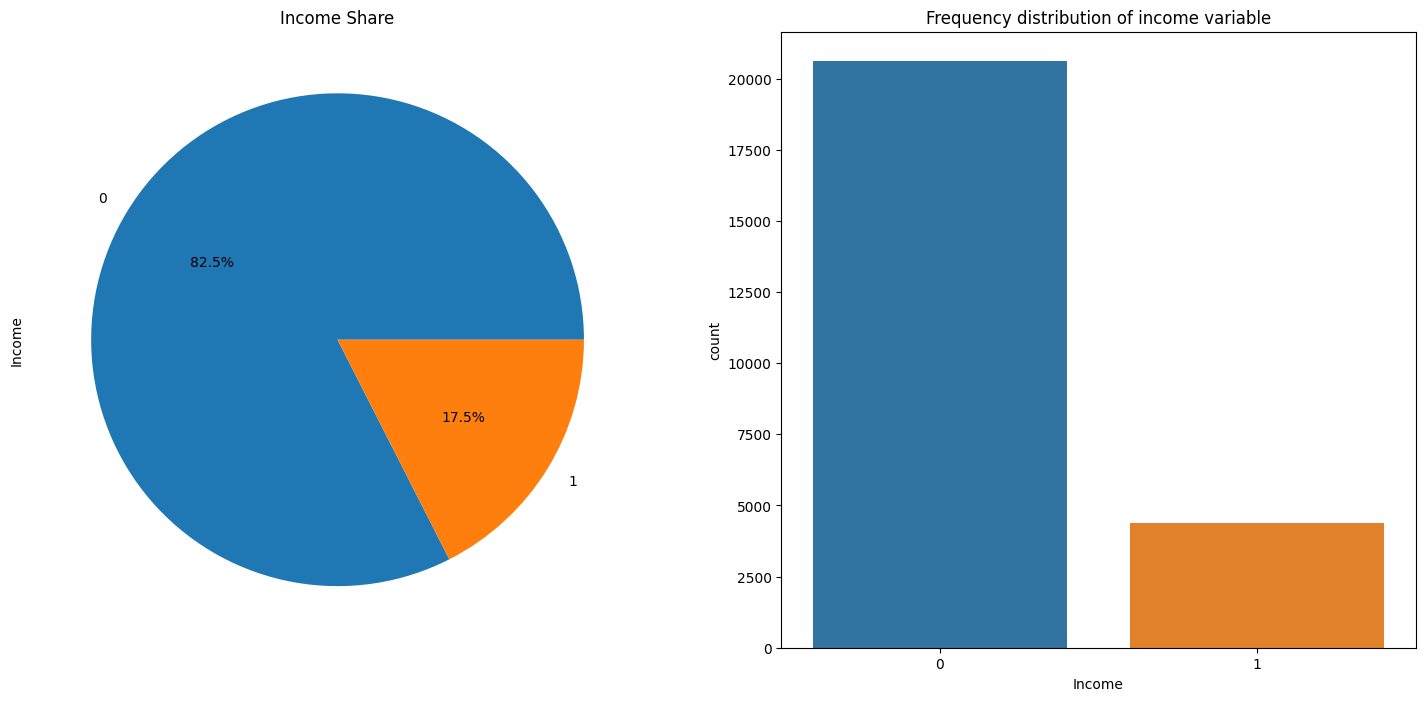

In [ ]:
f,ax=plt.subplots(1,2,figsize=(18,8))

ax[0] = publishing_dataset['Income'].value_counts().plot.pie(explode=[0,0], autopct='%1.1f%%', ax=ax[0])
ax[0].set_title('Income %')

ax[1] = sns.countplot(x="Income", data=publishing_dataset)
ax[1].set_title("Frequency distribution of income variable")

plt.show()

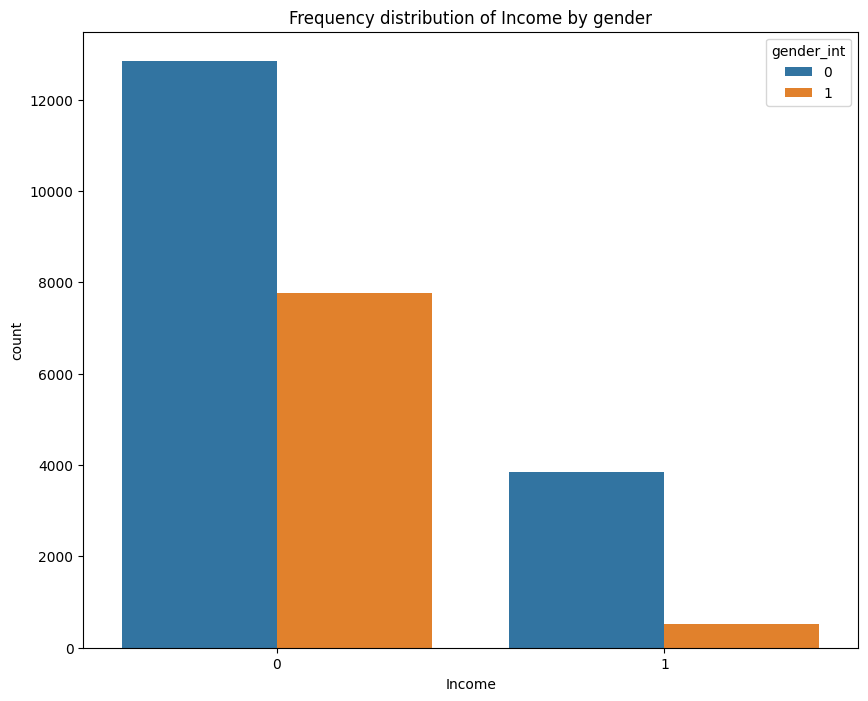

In [ ]:
f, ax = plt.subplots(figsize=(10, 8))
ax = sns.countplot(x="Income", hue="gender_int", data=publishing_dataset)
ax.set_title("Frequency distribution of Income by gender")
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
publishing_dataset.to_csv('/content/drive/My Drive/income_dataset.csv', index=False)

Mounted at /content/drive
